# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sinasc = pd.read_csv('G:\Downloads\sinasc_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape

(27028, 69)


(27028, 69)

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

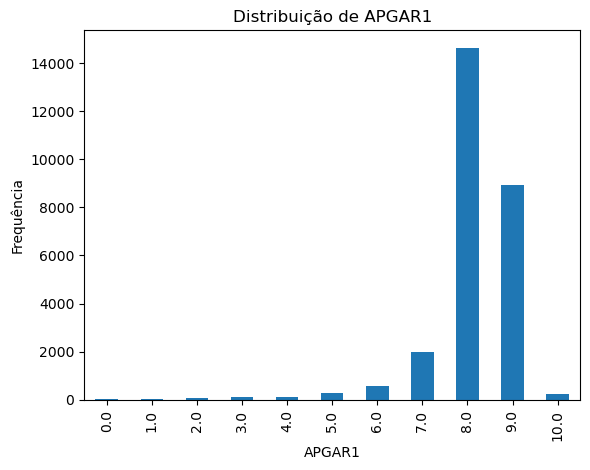

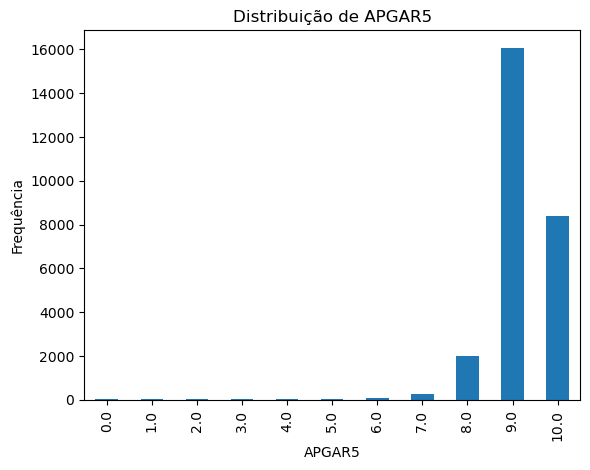

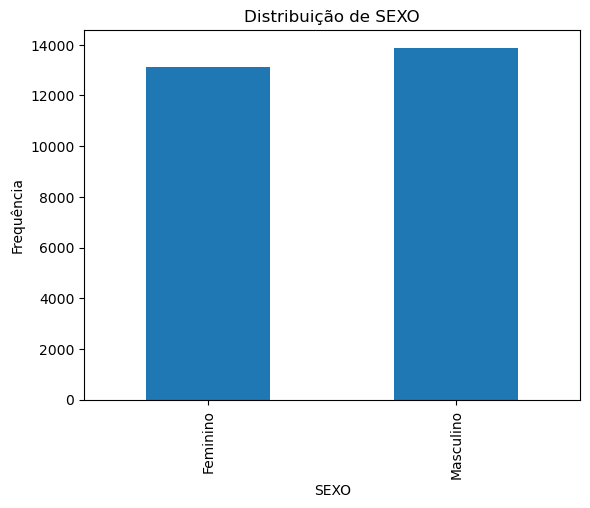

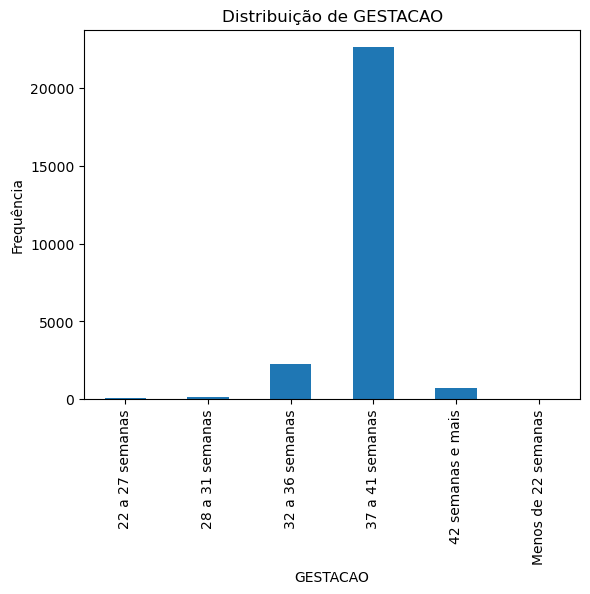

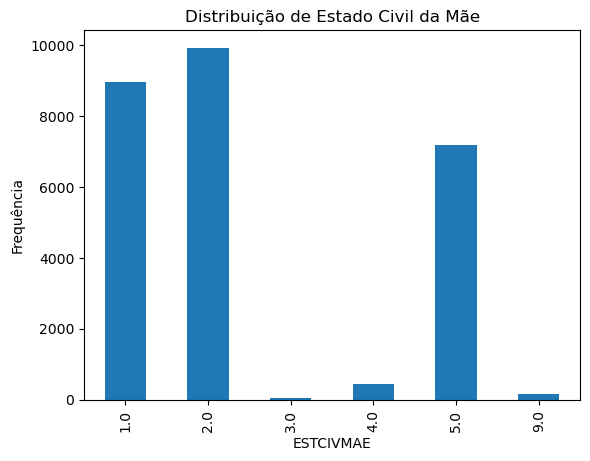

In [45]:
def plot_ordered_bar(data, column, title, colors=None):
    value_counts = data[column].value_counts().sort_index()
    value_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

# Definindo cores para o gráfico de 'Estado Civil da Mãe'
colors_estcivmae = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Criar gráficos de barras de forma crescente numericamente
plot_ordered_bar(sinasc, 'APGAR1', 'Distribuição de APGAR1')
plot_ordered_bar(sinasc, 'APGAR5', 'Distribuição de APGAR5')
plot_ordered_bar(sinasc, 'SEXO', 'Distribuição de SEXO')
plot_ordered_bar(sinasc, 'GESTACAO', 'Distribuição de GESTACAO')
plot_ordered_bar(sinasc, 'ESTCIVMAE', 'Distribuição de Estado Civil da Mãe', colors=colors_estcivmae) # Título do gráfoco alterado

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

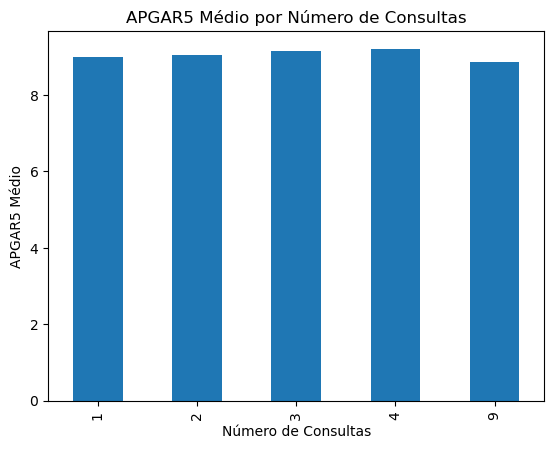

In [15]:
apgar5_media_por_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean()

# Criar gráfico de barras
apgar5_media_por_consultas.plot(kind='bar')
plt.title('APGAR5 Médio por Número de Consultas')
plt.xlabel('Número de Consultas')
plt.ylabel('APGAR5 Médio')
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

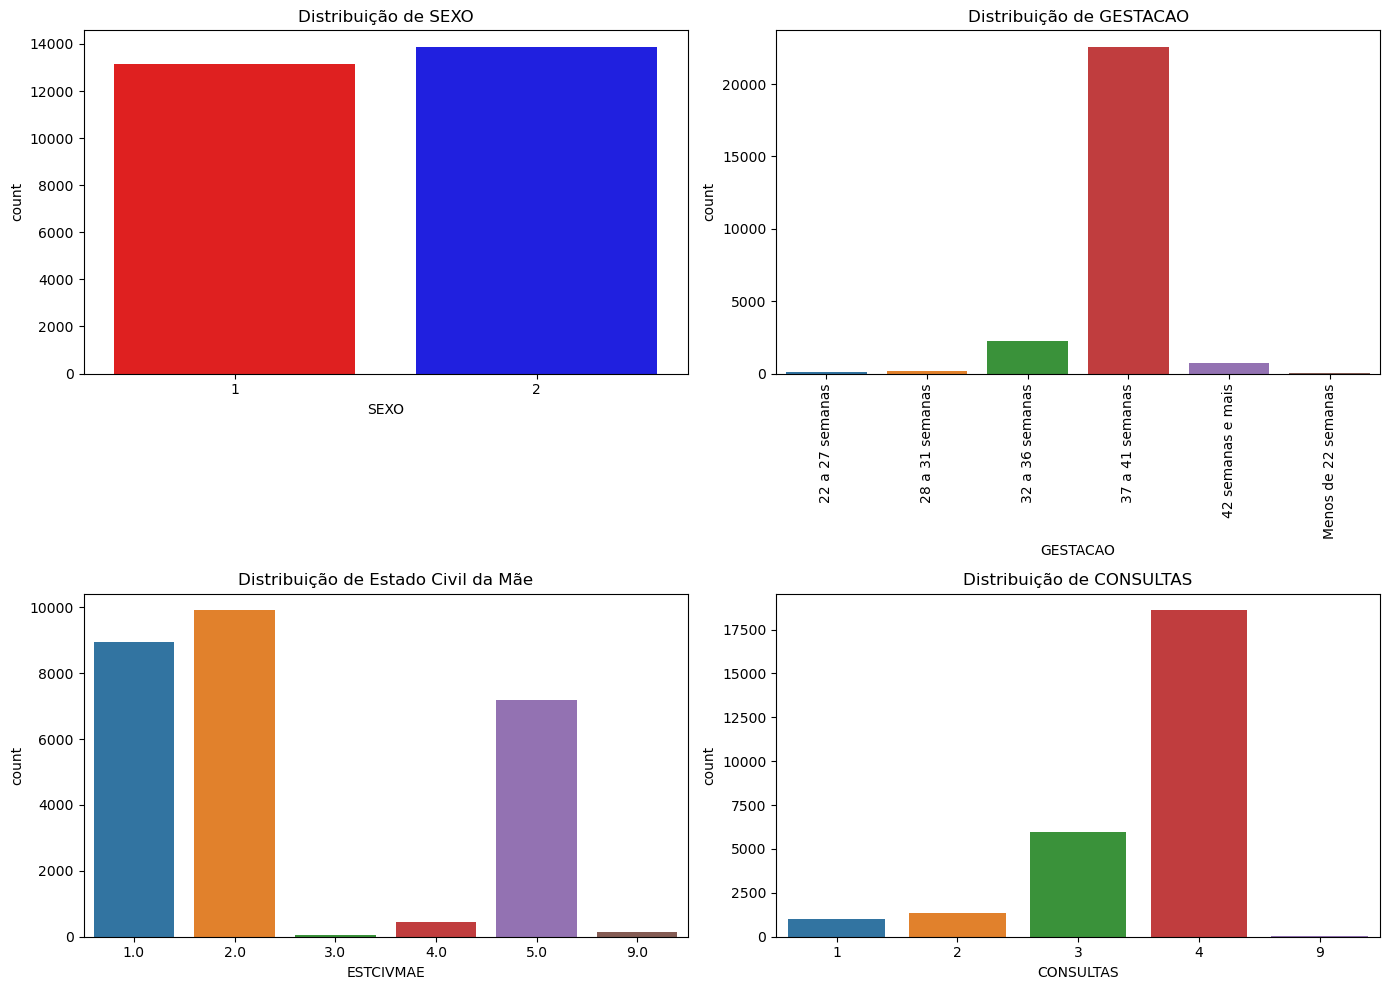

In [109]:
sinasc = pd.read_csv('G:\Downloads\sinasc_RO_2019.csv')

# Converter valores de 'Feminino' e 'Masculino' para 1 e 2 e definir as cores
sinasc['SEXO'] = sinasc['SEXO'].map({'Feminino': 1, 'Masculino': 2})
palette_sexo = {1: 'red', 2: 'blue'}

# Definir orden das categorias para Gestação (linha temporal)
gestacao_order = sorted(sinasc['GESTACAO'].dropna().unique())

# Criar um painel
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Distribuição de Sexo com cores definidas
sns.countplot(x='SEXO', data=sinasc, order=[1, 2], palette=palette_sexo, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição de SEXO')

# Distribuição de Gestação com rótulos na vertical
sns.countplot(x='GESTACAO', data=sinasc, order=gestacao_order, ax=axs[0, 1])
axs[0, 1].set_title('Distribuição de GESTACAO')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

# Distribuição de Estado Civil da Mãe
sns.countplot(x='ESTCIVMAE', data=sinasc, order=sorted(sinasc['ESTCIVMAE'].dropna().unique()), ax=axs[1, 0])
axs[1, 0].set_title('Distribuição de Estado Civil da Mãe')

# Distribuição de Consultas
sns.countplot(x='CONSULTAS', data=sinasc, order=sorted(sinasc['CONSULTAS'].dropna().unique()), ax=axs[1, 1])
axs[1, 1].set_title('Distribuição de CONSULTAS')

plt.tight_layout()
plt.show()